 Imports and Plot Settings

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set global plot style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)


Load the Data

In [11]:
# Load the datasets (adjust paths if needed)
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

print(f"Train shape: {train.shape}")
print(f"Test shape: {test.shape}")

train.head()


Train shape: (1460, 81)
Test shape: (1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


SalePrice Distribution

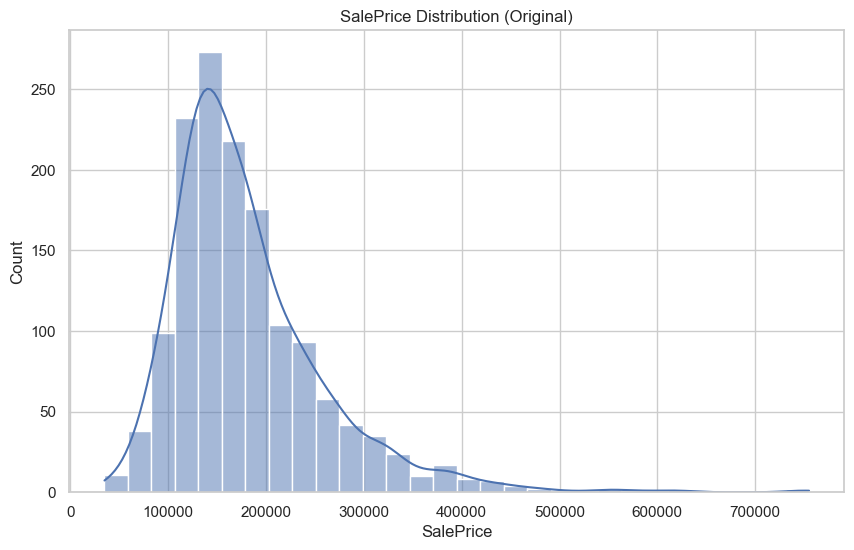

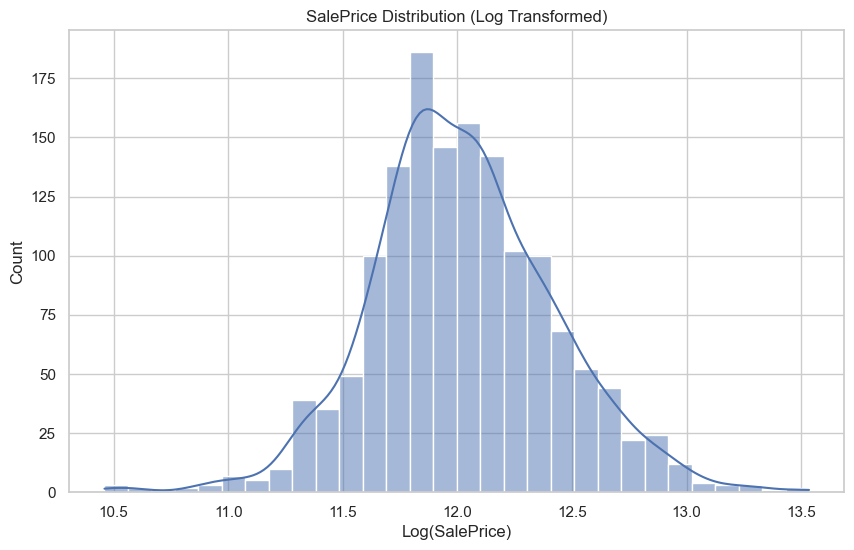

In [12]:
# Original SalePrice
sns.histplot(train['SalePrice'], kde=True, bins=30)
plt.title("SalePrice Distribution (Original)")
plt.xlabel("SalePrice")
plt.show()

# Log-transformed SalePrice
train['LogSalePrice'] = np.log1p(train['SalePrice'])

sns.histplot(train['LogSalePrice'], kde=True, bins=30)
plt.title("SalePrice Distribution (Log Transformed)")
plt.xlabel("Log(SalePrice)")
plt.show()


Missing Values Summary

In [13]:
missing = train.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
missing_percent = (missing / len(train)) * 100

missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Missing %': missing_percent
})

missing_df.head(20)


,Missing Count,Missing %
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
MasVnrType,872,59.726027
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageType,81,5.547945
GarageYrBlt,81,5.547945
GarageFinish,81,5.547945


 Visualize Missing Values

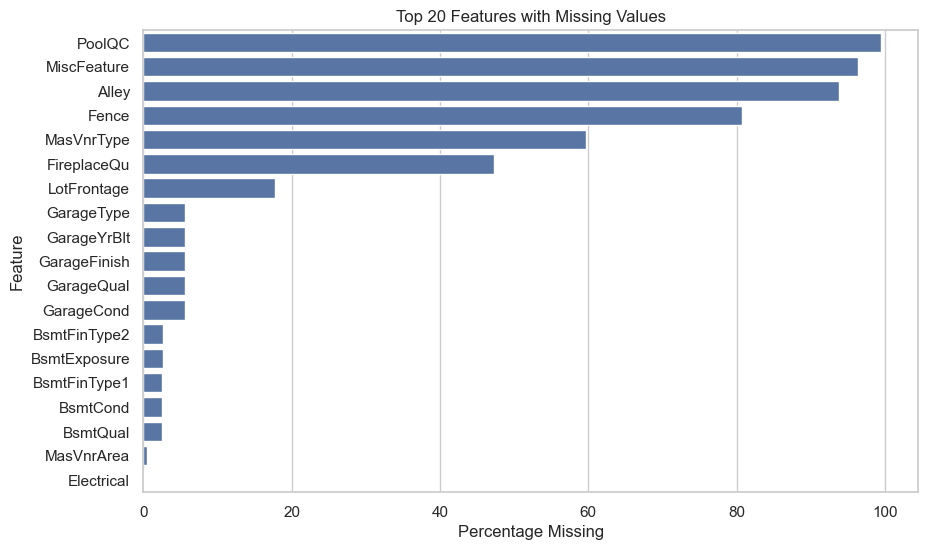

In [14]:
sns.barplot(x=missing_df['Missing %'].head(20), y=missing_df.index[:20])
plt.title("Top 20 Features with Missing Values")
plt.xlabel("Percentage Missing")
plt.ylabel("Feature")
plt.show()


Feature Type Breakdown

In [15]:
categorical_feats = train.select_dtypes(include=['object']).columns.tolist()
numerical_feats = train.select_dtypes(exclude=['object']).columns.tolist()
numerical_feats.remove('SalePrice')

discrete_feats = [col for col in numerical_feats if train[col].nunique() < 25]
continuous_feats = [col for col in numerical_feats if train[col].nunique() >= 25]
high_card_cat_feats = [col for col in categorical_feats if train[col].nunique() > 15]

print(f"Total features: {train.shape[1]}")
print(f"Categorical features: {len(categorical_feats)}")
print(f"Numerical features: {len(numerical_feats)}")
print(f" - Discrete: {len(discrete_feats)}")
print(f" - Continuous: {len(continuous_feats)}")
print(f"High-cardinality categoricals: {high_card_cat_feats}")


Total features: 82
Categorical features: 43
Numerical features: 38
 - Discrete: 18
 - Continuous: 20
High-cardinality categoricals: ['Neighborhood', 'Exterior2nd']


 Correlation with SalePrice

In [17]:
# Calculate correlation matrix for numerical features
corr_matrix = train.corr(numeric_only=True)

# Correlation with SalePrice
corr_with_target = corr_matrix['SalePrice'].sort_values(ascending=False)

# Display top 15 correlations
top_corr = corr_with_target[1:16]  # exclude SalePrice itself
print("Top 15 features correlated with SalePrice:")
print(top_corr)

Top 15 features correlated with SalePrice:
LogSalePrice    0.948374
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
Name: SalePrice, dtype: float64


 Heatmap of top correlated features

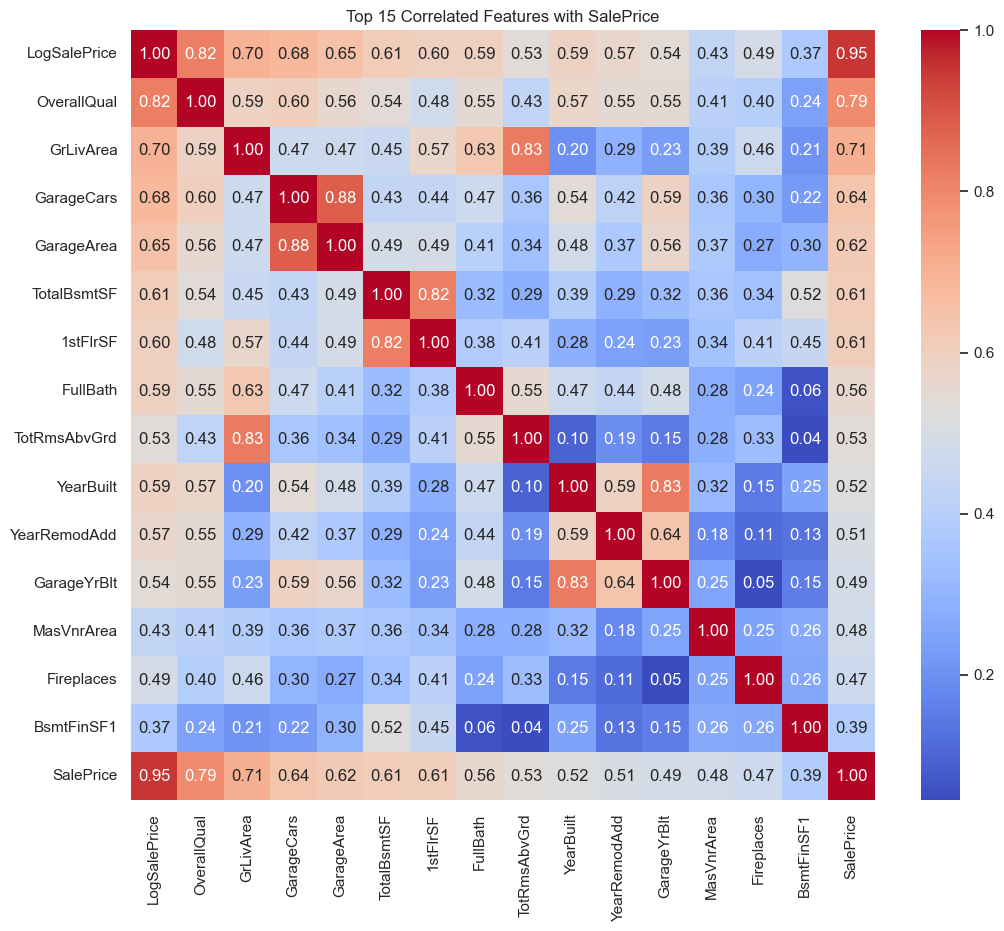

In [18]:
top_corr_features = top_corr.index.tolist() + ['SalePrice']
plt.figure(figsize=(12, 10))
sns.heatmap(train[top_corr_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Top 15 Correlated Features with SalePrice")
plt.show()

Pairplots for Key Features

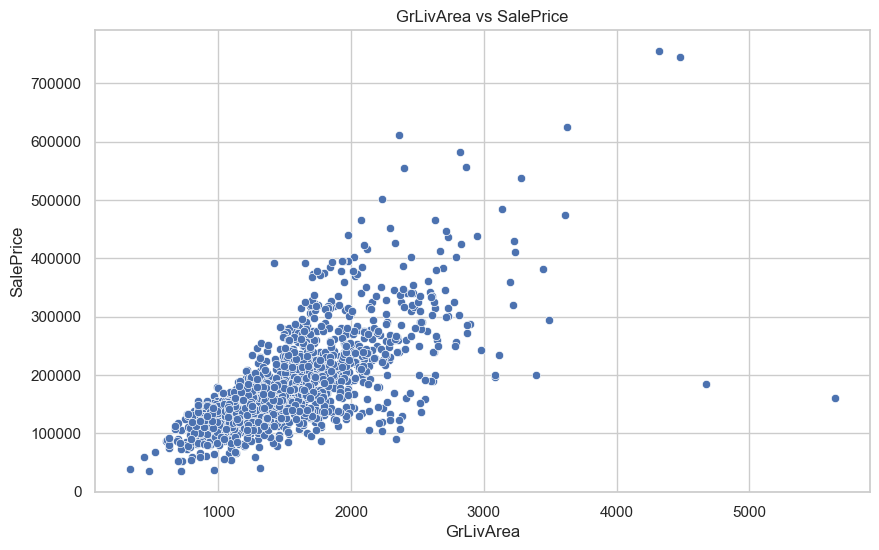

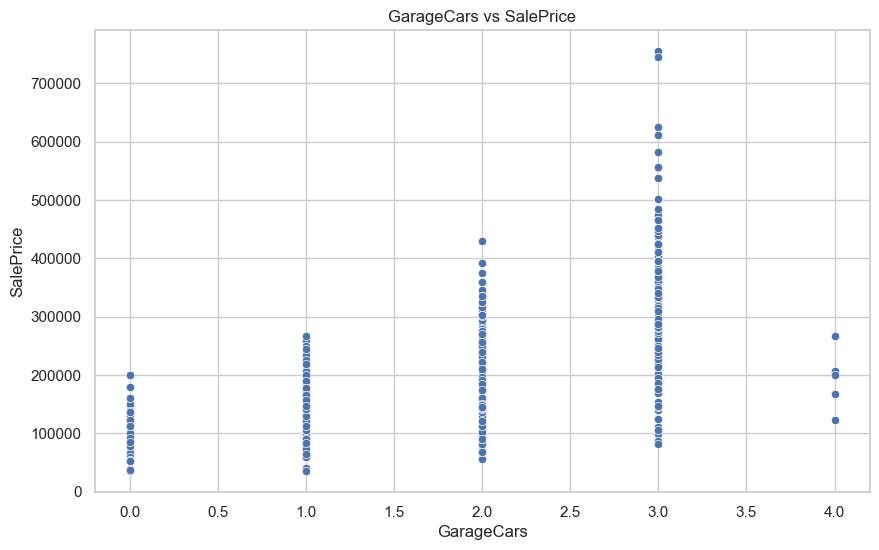

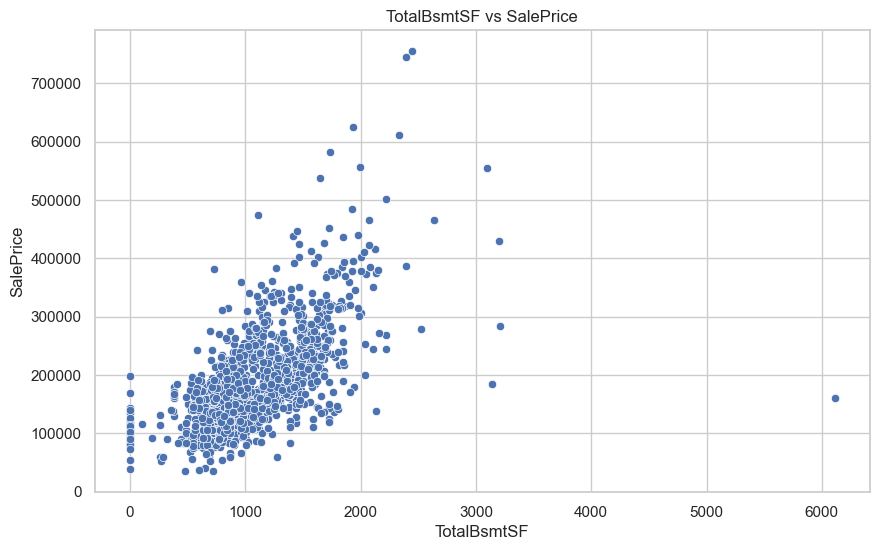

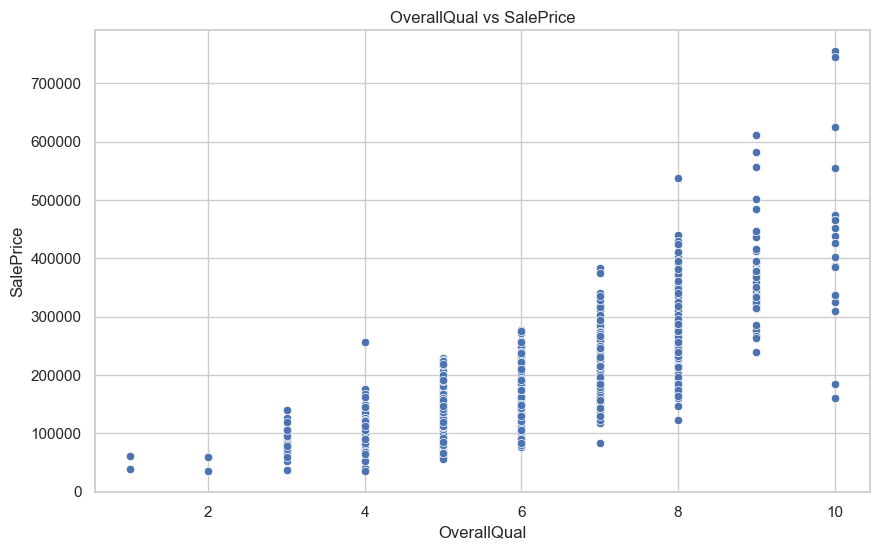

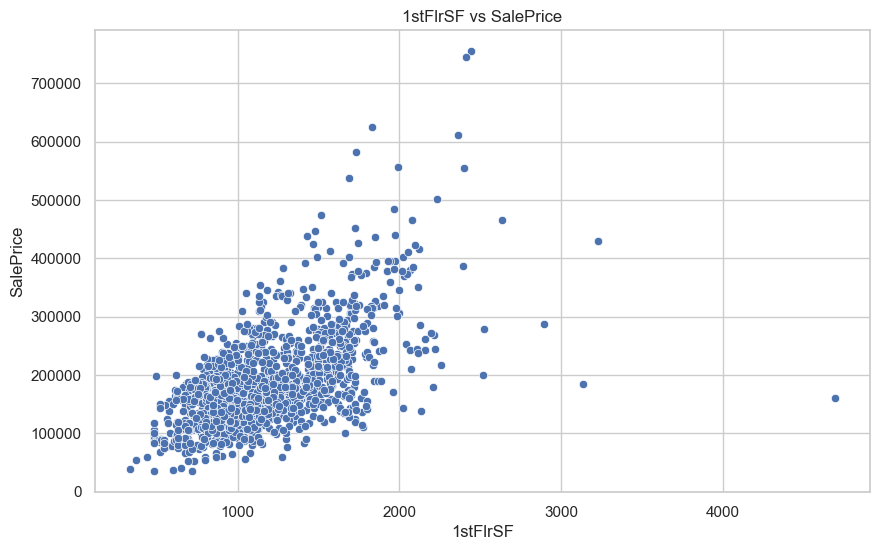

In [19]:
# Scatter plots for selected strong predictors
selected_features = ['GrLivArea', 'GarageCars', 'TotalBsmtSF', 'OverallQual', '1stFlrSF']

for feature in selected_features:
    sns.scatterplot(x=train[feature], y=train['SalePrice'])
    plt.title(f"{feature} vs SalePrice")
    plt.xlabel(feature)
    plt.ylabel("SalePrice")
    plt.show()


Detect All Outliers Using IQR

In [22]:
# Step 1: Select numerical features (excluding target)
numerical_cols = train.select_dtypes(include=[np.number]).columns.tolist()
numerical_cols.remove('SalePrice')
numerical_cols.remove('LogSalePrice')

# Step 2: Define a function to detect outliers using IQR
def detect_outliers(df, features):
    outlier_dict = {}
    for col in features:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_dict[col] = {
            "count": outliers.shape[0],
            "indices": outliers.index.tolist()
        }

    return outlier_dict

# Step 3: Run the function
outlier_results = detect_outliers(train, numerical_cols)

# Step 4: Show summary
outlier_summary = pd.DataFrame({
    "Feature": outlier_results.keys(),
    "Outlier Count": [v["count"] for v in outlier_results.values()]
}).sort_values(by="Outlier Count", ascending=False)

print(outlier_summary)


          Feature  Outlier Count
30  EnclosedPorch            208
10     BsmtFinSF2            167
5     OverallCond            125
32    ScreenPorch            116
1      MSSubClass            103
8      MasVnrArea             96
2     LotFrontage             86
18   BsmtHalfBath             82
29    OpenPorchSF             75
22   KitchenAbvGr             68
3         LotArea             66
12    TotalBsmtSF             59
34        MiscVal             52
21   BedroomAbvGr             35
28     WoodDeckSF             32
11      BsmtUnfSF             29
16      GrLivArea             29
23   TotRmsAbvGrd             28
15   LowQualFinSF             26
31      3SsnPorch             24
27     GarageArea             20
13       1stFlrSF             18
6       YearBuilt              7
33       PoolArea              6
9      BsmtFinSF1              5
26     GarageCars              5
24     Fireplaces              4
4     OverallQual              2
14       2ndFlrSF              2
17   BsmtF

Remove Outliers Based on IQR Method

In [ ]:
# Set a threshold for outlier removal
THRESHOLD = 30  # you can tune this

# Collect indices of rows to remove
remove_indices = set()
for feature, info in outlier_results.items():
    if info['count'] > THRESHOLD:
        print(f"Removing outliers from: {feature} ({info['count']} rows)")
        remove_indices.update(info['indices'])

# Drop outlier rows
print(f"\nTotal rows to remove: {len(remove_indices)}")
train = train.drop(index=remove_indices).reset_index(drop=True)


Removing outliers from: MSSubClass (103 rows)
Removing outliers from: LotFrontage (86 rows)
Removing outliers from: LotArea (66 rows)
Removing outliers from: OverallCond (125 rows)
Removing outliers from: MasVnrArea (96 rows)
Removing outliers from: BsmtFinSF2 (167 rows)
Removing outliers from: TotalBsmtSF (59 rows)
Removing outliers from: BsmtHalfBath (82 rows)
Removing outliers from: BedroomAbvGr (35 rows)
Removing outliers from: KitchenAbvGr (68 rows)
Removing outliers from: WoodDeckSF (32 rows)
Removing outliers from: OpenPorchSF (75 rows)
Removing outliers from: EnclosedPorch (208 rows)
Removing outliers from: ScreenPorch (116 rows)
Removing outliers from: MiscVal (52 rows)

Total rows to remove: 846


Boxplot Visualizations for Top Outlier Features

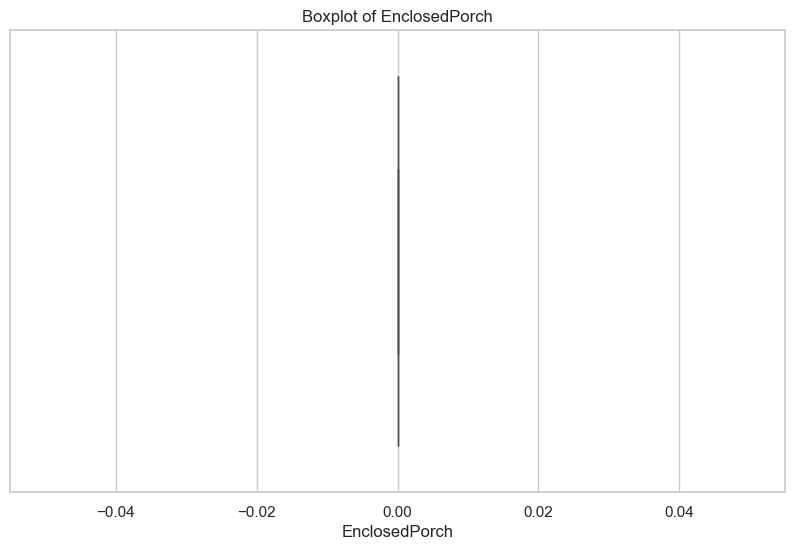

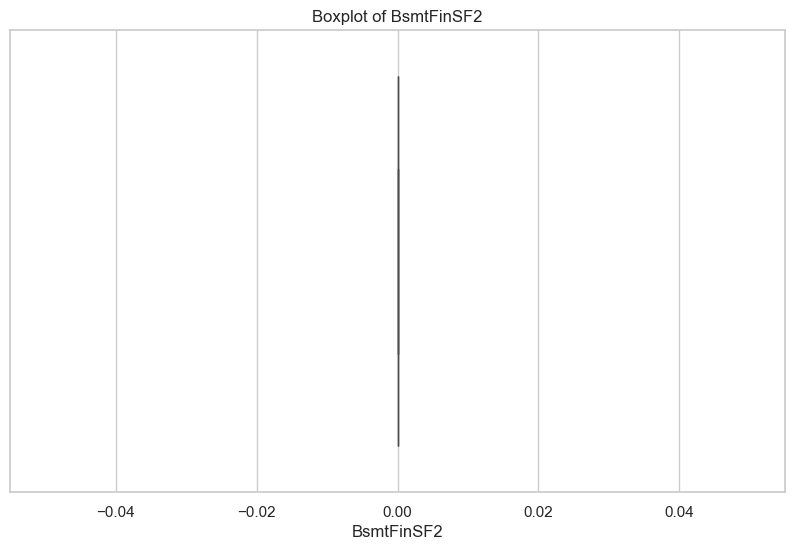

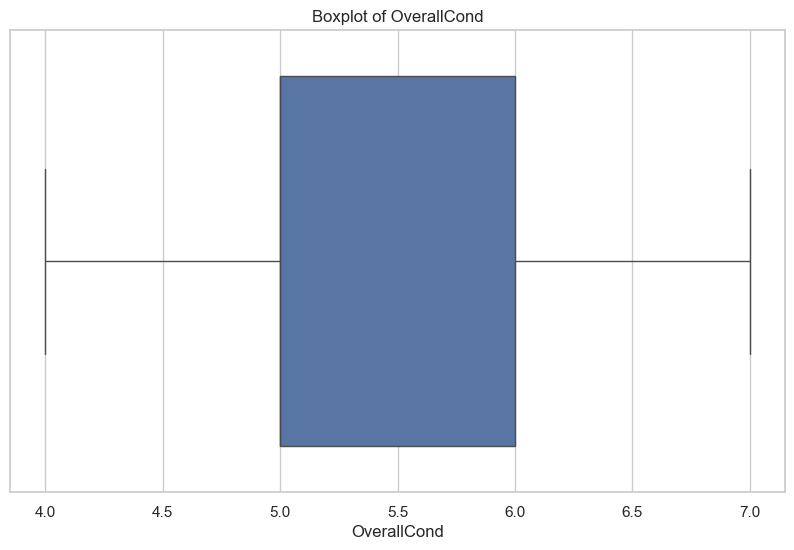

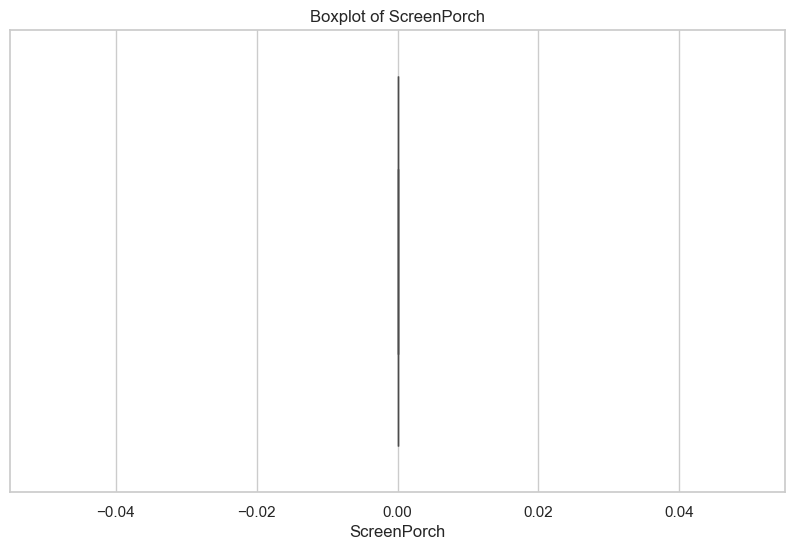

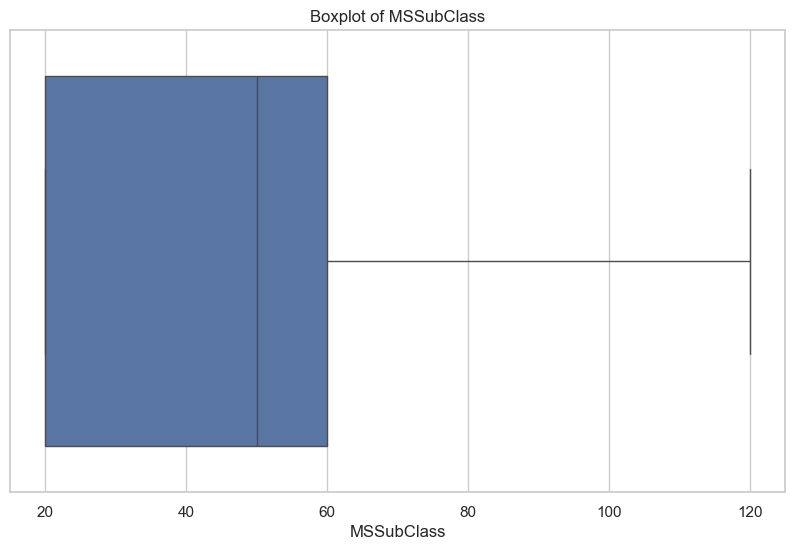

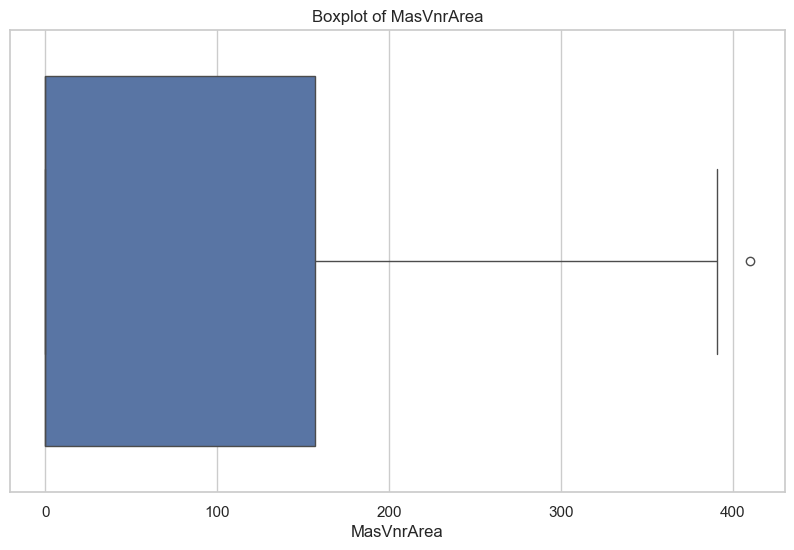

In [24]:
# Show boxplots for features with most outliers (top 6)
top_outlier_features = outlier_summary.head(6)['Feature'].tolist()

for feature in top_outlier_features:
    sns.boxplot(x=train[feature])
    plt.title(f"Boxplot of {feature}")
    plt.show()


Detect Skewed Features

In [26]:
from scipy.stats import skew

# Select numerical features (exclude SalePrice & log version)
numeric_feats = train.select_dtypes(include=[np.number]).drop(columns=['SalePrice', 'LogSalePrice'], errors='ignore')

# Compute skewness
skewness = numeric_feats.apply(lambda x: skew(x.dropna())).sort_values(ascending=False)

# Select features with skew > 0.75
high_skew = skewness[skewness > 0.75]
print(f"Found {len(high_skew)} highly skewed features:\n")
print(high_skew)


Found 4 highly skewed features:

PoolArea        24.677959
LowQualFinSF    12.403722
3SsnPorch        7.456646
OverallCond      1.197614
dtype: float64


C:\Users\tambe\AppData\Local\Temp\ipykernel_16152\126309957.py:7: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = numeric_feats.apply(lambda x: skew(x.dropna())).sort_values(ascending=False)


Decide What to Transform

In [27]:
# Manually classify the skewed features
transform_skewed = ['OpenPorchSF', 'MasVnrArea', '2ndFlrSF', 'MSSubClass', 'OverallCond']
binary_from_skewed = ['PoolArea', 'LowQualFinSF', '3SsnPorch']


Apply Transformations

In [28]:
# Apply log1p to correct skewed features
train[transform_skewed] = np.log1p(train[transform_skewed])
test[transform_skewed] = np.log1p(test[transform_skewed])

# Convert rare features into binary flags
for col in binary_from_skewed:
    train[f'Has_{col}'] = (train[col] > 0).astype(int)
    test[f'Has_{col}'] = (test[col] > 0).astype(int)


Feature Engineering

In [29]:
# Total square footage (above and below ground)
train['TotalSF'] = train['TotalBsmtSF'] + train['1stFlrSF'] + train['2ndFlrSF']
test['TotalSF'] = test['TotalBsmtSF'] + test['1stFlrSF'] + test['2ndFlrSF']

# House age at time of sale
train['HouseAge'] = train['YrSold'] - train['YearBuilt']
test['HouseAge'] = test['YrSold'] - test['YearBuilt']

# Binary: Was house remodeled?
train['Remodeled'] = (train['YearRemodAdd'] != train['YearBuilt']).astype(int)
test['Remodeled'] = (test['YearRemodAdd'] != test['YearBuilt']).astype(int)

# Total bathrooms (full + half)
train['TotalBath'] = train['FullBath'] + 0.5 * train['HalfBath']
test['TotalBath'] = test['FullBath'] + 0.5 * test['HalfBath']


Combine Train + Test for Consistent Encoding

In [30]:
# Add 'Source' column to separate them later
train['Source'] = 'train'
test['Source'] = 'test'
combined = pd.concat([train, test], axis=0)


Label Encode Ordinal Features

In [31]:
# Manual mapping for ordinal features (example)
ordinal_mappings = {
    "Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1, np.nan: 0
}

ordinal_cols = ['ExterQual', 'ExterCond', 'HeatingQC', 'KitchenQual', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond']

for col in ordinal_cols:
    if col in combined.columns:
        combined[col] = combined[col].map(ordinal_mappings)


One-Hot Encode All Other Categorical Features

In [32]:
# Auto-detect remaining object type columns
object_cols = combined.select_dtypes(include='object').columns.tolist()
object_cols = [col for col in object_cols if col != 'Source']  # exclude 'Source'

# Apply one-hot encoding
combined = pd.get_dummies(combined, columns=object_cols, drop_first=True)


Split Train and Test Back

In [33]:
# Separate processed data
train = combined[combined['Source'] == 'train'].drop(columns=['Source'])
test = combined[combined['Source'] == 'test'].drop(columns=['Source', 'SalePrice', 'LogSalePrice'], errors='ignore')


Identify Numeric Features

In [34]:
from sklearn.preprocessing import StandardScaler

# Drop target and ID if present
features_to_scale = train.drop(columns=['Id', 'SalePrice', 'LogSalePrice'], errors='ignore').select_dtypes(include=[np.number]).columns.tolist()


Scale Train and Test Sets Using StandardScaler

In [35]:
# Initialize scaler
scaler = StandardScaler()

# Fit on train, transform both train and test
train[features_to_scale] = scaler.fit_transform(train[features_to_scale])
test[features_to_scale] = scaler.transform(test[features_to_scale])


Check After Scaling

In [36]:
# Check mean and std for any column
print(train[features_to_scale].mean().round(2).head())
print(train[features_to_scale].std().round(2).head())


MSSubClass     0.0
LotFrontage   -0.0
LotArea        0.0
OverallQual    0.0
OverallCond    0.0
dtype: float64
MSSubClass     1.0
LotFrontage    1.0
LotArea        1.0
OverallQual    1.0
OverallCond    1.0
dtype: float64


Define Features and Target

In [37]:
# Target variable (log-transformed for evaluation)
X = train.drop(columns=['Id', 'SalePrice', 'LogSalePrice'], errors='ignore')
y = train['LogSalePrice']  # Use log-transformed target for RMSE

# Test set for final submission
X_test = test.copy()


Fill Missing Values Before Modeling

In [40]:
from sklearn.impute import SimpleImputer

# Clean test set: drop Id, SalePrice, etc. to match train features
X_test = X_test.drop(columns=['Id'], errors='ignore')

# Impute missing values with mean
imputer = SimpleImputer(strategy='mean')

# Fit on training data
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Apply the same transform to test data
X_test = pd.DataFrame(imputer.transform(X_test), columns=X.columns)


Model Training with Cross-Validation

In [41]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error
import numpy as np

def rmse_cv(model, X, y):
    rmse = -cross_val_score(model, X, y, scoring="neg_root_mean_squared_error", cv=5)
    return rmse.mean()

# Linear
lin_reg = LinearRegression()
print("Linear Regression RMSE:", rmse_cv(lin_reg, X, y))

# Lasso
lasso = Lasso(alpha=0.001, max_iter=10000)
print("Lasso RMSE:", rmse_cv(lasso, X, y))

# Ridge
ridge = Ridge(alpha=10)
print("Ridge RMSE:", rmse_cv(ridge, X, y))


Linear Regression RMSE: 0.11759752083361388
Lasso RMSE: 0.1049754117105566
Ridge RMSE: 0.10466991460278577


 Fit Models on Full Training Data

In [ ]:
# Fit models on the full training data
lin_reg.fit(X, y)
lasso.fit(X, y)
ridge.fit(X, y)



Ridge(alpha=10)

XGBoost Modeling + Hyperparameter Tuning (GridSearch)

In [44]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

# Base model (optional: set random_state for reproducibility)
xgb = XGBRegressor(objective='reg:squarederror', n_jobs=-1, random_state=42)


In [46]:
# A small grid to keep it fast (expand later if needed)
param_grid = {
    'n_estimators': [100, 300],
    'max_depth': [3, 5],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8, 1],
}


In [47]:
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    verbose=2,
    n_jobs=-1
)

grid_search.fit(X, y)


Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, feature_weights=None,
                                    gamma=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=-1, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1], 'max_depth': [3, 5],
                         'n_estimators': [100, 300], 'subsample': [0.8, 1]},
             scoring='neg_root_mean_squared_error', verbose=2)

In [48]:
print("Best RMSE:", -grid_search.best_score_)
print("Best Parameters:", grid_search.best_params_)


Best RMSE: 0.11309106421441288
Best Parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.8}


In [ ]:
# Predict on test set using the best model
best_model = grid_search.best_estimator_

final_preds = np.expm1(best_model.predict(X_test))



Predict from XGBoost 

In [54]:
xgb_preds   = np.expm1(best_model.predict(X_test)) 


Predict and Reverse Log Transform

In [ ]:
# Predict on test set and convert back from log scale
lin_preds = np.expm1(lin_reg.predict(X_test))
lasso_preds = np.expm1(lasso.predict(X_test))
ridge_preds = np.expm1(ridge.predict(X_test))
xgb_preds   = np.expm1(best_model.predict(X_test))  

Combine All Predictions into One DataFrame

In [55]:
# Combine all model predictions
final_submission = pd.DataFrame({
    'Id': test['Id'],
    'Linear': lin_preds,
    'Lasso': lasso_preds,
    'Ridge': ridge_preds,
    'XGBoost': xgb_preds
})

# Add Blended average
final_submission['Blended'] = final_submission[['Linear', 'Lasso', 'Ridge', 'XGBoost']].mean(axis=1)


In [56]:
# Save all model outputs for comparison
final_submission.to_csv("all_model_predictions.csv", index=False)

# Create Kaggle submission using Blended
final_submission[['Id', 'Blended']].rename(columns={'Blended': 'SalePrice'}).to_csv("submission.csv", index=False)
